### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from pandas import DatetimeIndex

%matplotlib inline

### Carregamento de dados

In [2]:
dataOriginal = pd.read_excel('Global_Superstore2.xlsx', index_col=0, comment='#') 
df = dataOriginal

### Exploração dos dados

In [3]:
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,
32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical
25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,0.1,919.9710,915.49,Medium


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.000000,51200.000000,51200.000000,51200.000000,51200.000000,51200.000000
mean,55190.379428,246.865006,3.476426,0.143026,28.639338,26.416522
std,32063.693350,487.908698,2.278923,0.212409,174.491125,57.338685
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,23223.000000,30.880000,2.000000,0.000000,0.000000,2.620000
50%,56430.500000,85.273800,3.000000,0.000000,9.255100,7.810000
75%,90008.000000,251.640000,5.000000,0.200000,36.841500,24.530000
max,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 32298 to 6147
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        51290 non-null  object 
 1   Order Date      51290 non-null  object 
 2   Ship Date       51290 non-null  object 
 3   Ship Mode       51290 non-null  object 
 4   Customer ID     51290 non-null  object 
 5   Customer Name   51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Postal Code     9994 non-null   float64
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51251 non-null  object 
 17  Sales           51200 non-nu

Por esta análise, temos 51290 entradas, sendo que apenas 51200 tem o nosso target.

Também podemos ver que temos alguns dados repetidos, por exemplo "customer id" e "customer name".

Pela tabela podemos concluir que temos falta de dados do tipo "Postal code". E, visto que esta coluna retrata a mesma informação que as colunas "City" e "Country", é lógico removermos esta informação na parte de tratamento de dados.

Todas as colunas tem regiões muito diferentes, logo é preciso normalizá-las, porque quantidade varia entre 1 e 14, e sales entre 0.44 e 22638.

In [6]:
# count number of distinct elements in specified axis. Can ignore NaN values
df.nunique()

Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3781
Sales             22967
Quantity             14
Discount             27
Profit            24523
Shipping Cost     10037
Order Priority        4
dtype: int64

Como temos muitos códigos postais ausentes, e essa informação é redundante com as colunas de cidade, estado, e país, podemos removê-la.

In [7]:
# verifica que feautures tem duplicados, verificando se o número rows únicos de cada feature é igual ao número de rows do dataset. 
# Se não for igual quer dizer que há repetidos.
columns = df.columns
for i in columns:
    if not ( len(df[i].unique()) == len(df) ) :  
        print(i)

Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


In [8]:
# Análise de colunas com valores nulos
print("Total de valores nulos ")
print(df.isnull().sum())

#print("\nTotal de valores NaN ")
#print(df.isna().sum())

Total de valores nulos 
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name         39
Sales                90
Quantity             90
Discount             90
Profit               90
Shipping Cost        90
Order Priority       90
dtype: int64


In [9]:
# Rows without Product name
data_with_no_Product_Name = df[df['Product Name'].isnull()]
print("How many entrances without Product name? ", len(data_with_no_Product_Name.index))
print("Those, how many don't have the profit column as well? ", data_with_no_Product_Name['Profit'].isnull().sum())

# Rows without Profit
data_with_no_profit = df[df['Profit'].isnull()]
#print(data_with_no_profit)
print("Total number of columns without profit: ", len(data_with_no_profit.index))
print("Those, how many are from US? ",data_with_no_profit['Country'].str.contains("United States").size)
#print("Number of columns without profit: ",data_with_no_profit['Sub-Category'].str.contains("Art").contains("Envelopes"))
print("From the columns without profit, how many are related to Art or Envelopes? ", len(data_with_no_profit.set_index('Sub-Category').filter(regex='(Art)|(Envelopes)', axis=0).index))

How many entrances without Product name?  39
Those, how many don't have the profit column as well?  39
Total number of columns without profit:  90
Those, how many are from US?  90
From the columns without profit, how many are related to Art or Envelopes?  90


Logo, podemos concluir que todas as colunas que não tem a informação "Product name" também não tem informação sobre o lucro.
Outra informação interessante é que todas as colunas que não tem "profit" registado são dos USA, e estão relacionadas com Artes ou Envelopes.

Logo, como não temos a coluna "profit", podemos remover essas entradas da base de dados.

Perguntar a um professor se esta informação é relevante.


### Análise Visual dos dados

Coluna:  Ship Mode


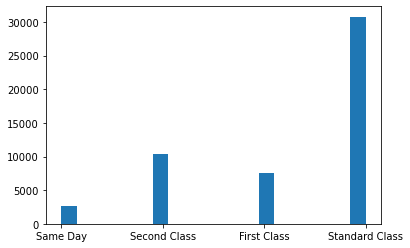

Coluna:  Segment


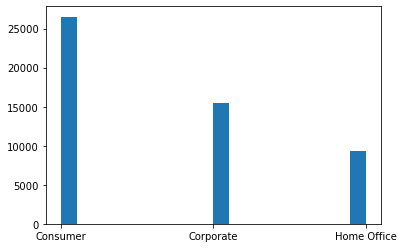

Coluna:  Market


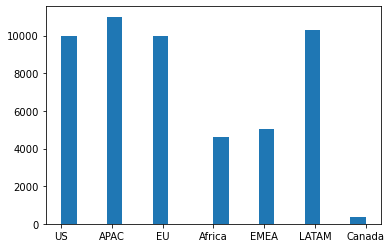

Coluna:  Category


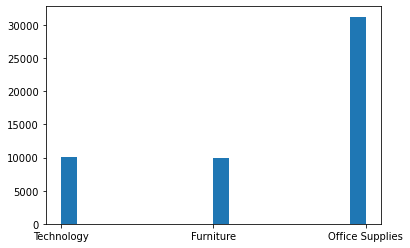

Coluna:  Order Priority


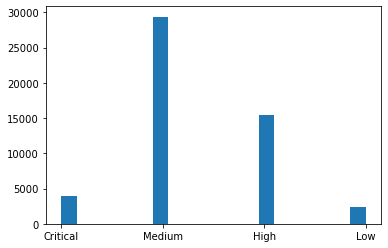

In [10]:
#Histograma com colunas com menos de 10 elementos.
plt.show()
for coluna in df.select_dtypes(exclude=["number","bool_"]).columns:
    if df[coluna].nunique() < 10:
        print("Coluna: ", coluna)
        #print(data[coluna])
        plt.hist(df[coluna].dropna(), bins = 20)
        plt.show()

Pela análise dos gráficos, podemos concluir que os dados não estão bem distribuídos, mas a informação que possuem pode ajudar na previsão dos modelos.

In [17]:
# Análise de percentagens
def show_frequencies_categorys():
    for coluna in df.select_dtypes(exclude=["number","bool_", "float64"]).columns:
        #print(coluna)
        if df[coluna].nunique() > 10 and ("Date" not in coluna) and ("ID" not in coluna):

            
            #df2=dfgroupby([coluna])[coluna].sum().rename("Courses_fee").groupby(level = 0).transform(lambda x: x/x.sum())
            coluna_percentagens = (df[coluna].value_counts()/df[coluna].count())*100
           # print(coluna_percentagens)
           # print("Exp:")
            values = coluna_percentagens.groupby(coluna_percentagens > 1).filter(lambda x: x.mean() > 1)
            if values.size > 0:
                print("\n", coluna, "'s com mais de 1% de valores\n")
                print(values)
show_frequencies_categorys()

Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City

 City 's com mais de 1% de valores

New York City    1.783973
Los Angeles      1.456424
Philadelphia     1.046988
Name: City, dtype: float64
State

 State 's com mais de 1% de valores

California                3.901345
England                   2.922597
New York                  2.199259
Texas                     1.920452
Ile-de-France             1.912654
New South Wales           1.522714
North Rhine-Westphalia    1.401833
Queensland                1.397933
San Salvador              1.199064
Pennsylvania              1.144473
National Capital          1.136674
Name: State, dtype: float64
Country

 Country 's com mais de 1% de valores

United States         19.485280
Australia              5.531293
France                 5.511796
Mexico                 5.155001
Germany                4.026126
China                  3.665432
United Kingdom         3.183857
Brazil                 3.117567
India             

> Acho que para evitarmos overfitting, tudo o que é menos de 1% é para juntar. Porque assim, ele pode começar a decorar, o que não faz sentido. Escolher percentagem, também. Se calhar confirmamos com um professor?

Como podemos ver, são poucas as categorias que possuem elementos com mais de 1%, logo, os dados são bastante dispersos.


Coluna:  Sales
Min: 0.444; Max: 22638.48


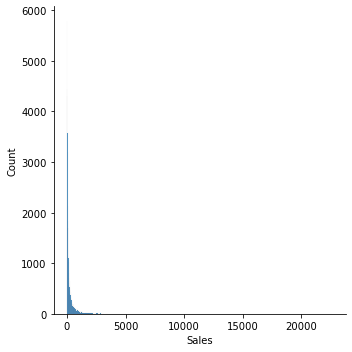


Coluna:  Quantity
Min: 1.0; Max: 14.0


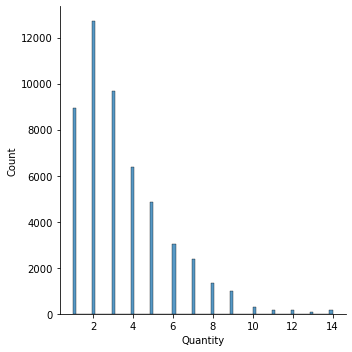


Coluna:  Discount
Min: 0.0; Max: 0.85


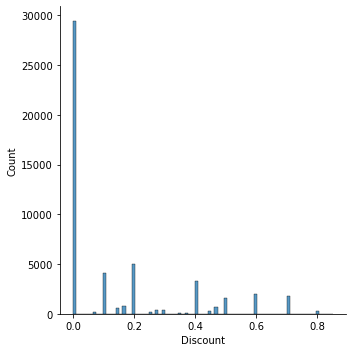


Coluna:  Profit
Min: -6599.978; Max: 8399.976


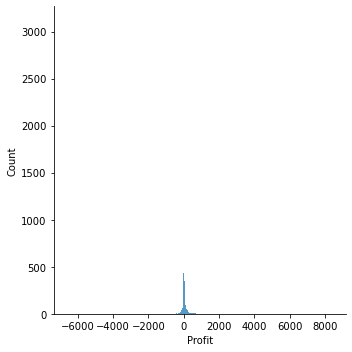


Coluna:  Shipping Cost
Min: 0.0; Max: 933.57


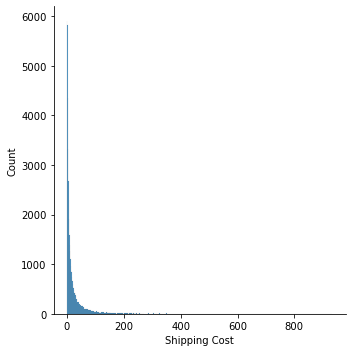

In [12]:
# Gostava de perceber o gráfico do Profit

data = df.drop('Postal Code', axis=1)

for coluna in data.select_dtypes(include=["number","float64"]).columns:
    print("\nColuna: ", coluna)
    #sns.displot(df[coluna],height=5,aspect=10)
    sns.displot(data[coluna])
    print("Min: {}; Max: {}".format(data[coluna].min(),data[coluna].max()))
    plt.show()
    
#df.groupby(["Sales"])["Sales"].count().sort_values(ascending=False)
#df[df["Sales"]<15]

Analisando cada uma das colunas:
- Quantity, faz sentido juntar os que estão no máximo, a partir do 10.
- Discount, faz sentido fazer bins por regiões, tipo 0 a 0.2, 0.2 a 0.4, ... Assim não perdemos muita informação.
- Profit, remover outliers, acho.
- Shipping cost, meter mais de 200 para uma categoria.

Postal code não devia ser visto assim :)

<AxesSubplot:>

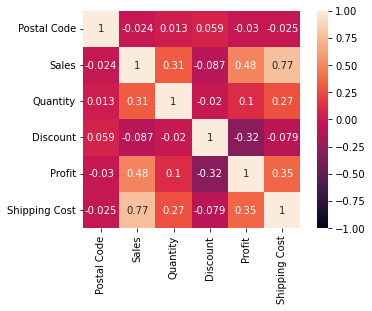

In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True,annot=True)

Como podemos ver, existe bastante correlação entre o shipping cost e as sales, logo provavelmente poderemos remover uma das colunas. 
Depois de converter colunas, e converter algumas para números, talvez voltar a relacionar.

É preciso normalizar para meter na matriz? :eyes:


Coluna:  Postal Code


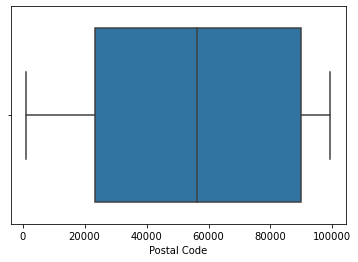


Coluna:  Sales


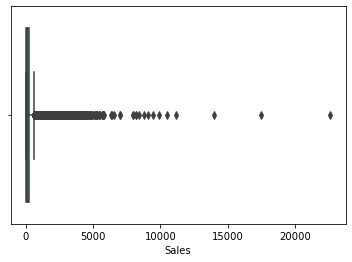


Coluna:  Quantity


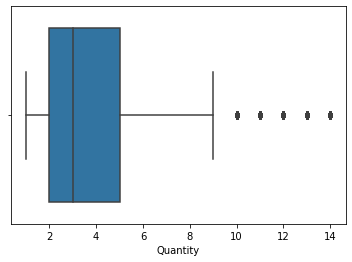


Coluna:  Discount


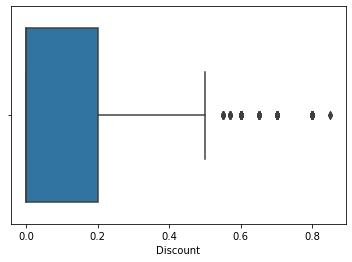


Coluna:  Profit


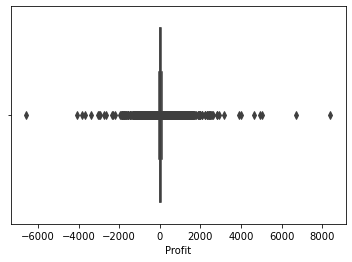


Coluna:  Shipping Cost


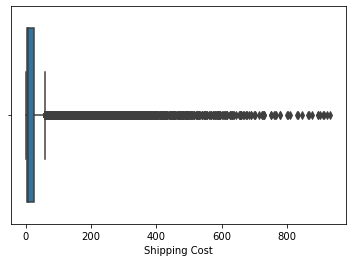

In [14]:
# Análise de dispersão de dados
for coluna in df.select_dtypes(include=["number","float64"]).columns:
    print("\nColuna: ", coluna)
    sns.boxplot(x = df[coluna])
    plt.show()

### Pela análise dos gráficos:
- Postal code: É ignorar
- Sales : Ou dividimos por bins, ou removemos outilers, mas são demasiados
- Quantity remover outliers superiores
- Discount igual
- Profit, aproveitar para analisar que se calhar é normalizado


Coluna:  Sales


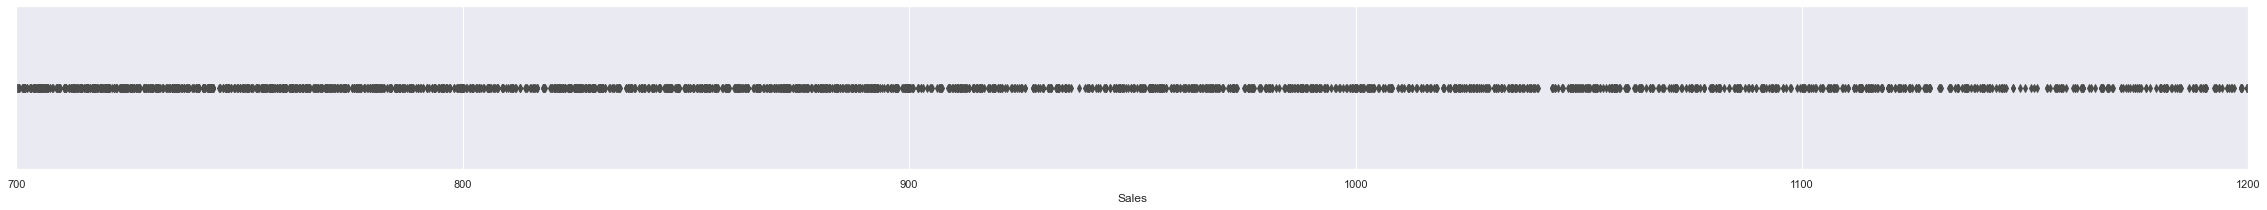


Coluna:  Profit


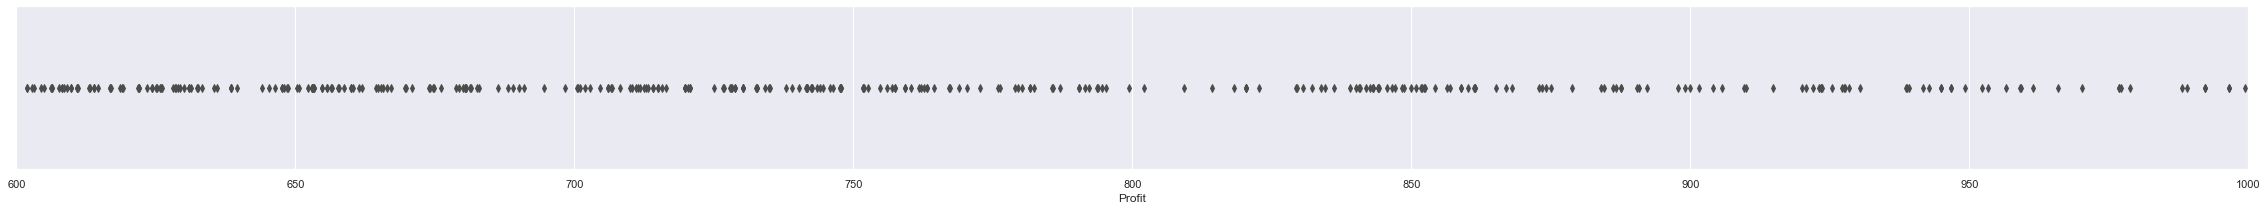


Coluna:  Shipping Cost


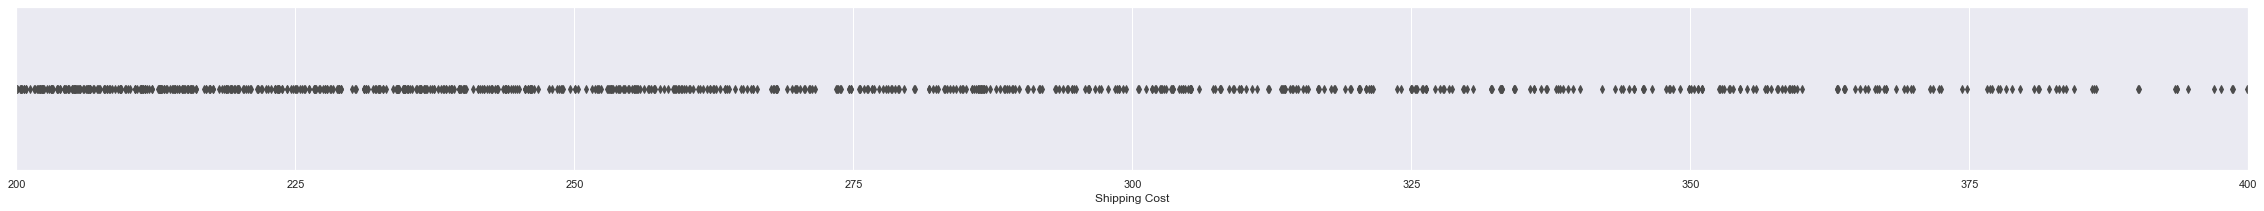

In [16]:
data2 = df[["Sales", "Profit", "Shipping Cost"]]

for coluna in data2.columns:
    print("\nColuna: ", coluna)
    sns.boxplot(x = df[coluna])
    sns.set(rc={'figure.figsize':(40,3)})
    if coluna=="Sales":
        plt.xlim(700,1200)
    if coluna=="Profit":
        plt.xlim(600,1000)
    if coluna=="Shipping Cost":
        plt.xlim(200,400)
    plt.show()